# Logisitic regression from scratch


Our loss function is
$$l_w(x, \tilde{y}) = log(1 + e^{-\tilde{y} \langle \hat{w}, x \rangle})$$

$$\frac{d_{l}}{dw} = \frac{-ye^{-y \langle \hat{w} , x \rangle }}{1 + e^{-\tilde{y} \langle \hat{w}, x \rangle}} x =  -\tilde{y} * \frac{1}{1 + e^{\tilde{y} \langle \hat{w}, x \rangle}} * x $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def predict_prob(w, x):
    '''
    w: weights
    x: data
    '''

    y_hat =  1 / (1 + np.exp(-1 * np.dot(x, w)))
    return y_hat

def compute_gradient(ys, xs, w):
    ret = -ys * (1 / (1 + np.exp(ys * np.dot(xs, w))))
    ret = ret[:, np.newaxis] * xs
    return np.mean(ret, axis=0)

In [5]:
df = pd.read_csv('heart.csv')
df = pd.get_dummies(df, columns=["cp", "restecg"], dtype=int)

# convert 0 to -1 for target
df.loc[df['target'] == 0, 'target'] = -1

# augment with bias 
df['bias'] = 1

# split to disjoin training set 66% and testing set 33%
idx66 = int(len(df) * 0.66)
df = df.sample(frac=1) # shuffle
train, test = df[:idx66], df[idx66:]

In [6]:
def ce_loss(ys, w, xs):
    ret = np.log(1 + np.exp(-1 * ys * np.dot(xs, w)))
    return np.mean(ret)

def grad_descent(train, test, target_var, lr=1e-4, tol=1e-6, epochs=100, max_iter=10000): 
    '''
    Performs Grad descent to update the parameter vector. 
    '''
    y_train = train[target_var].to_numpy()
    x_train = train[[i for i in df.columns if i != target_var]].to_numpy()
    
    y_test = test[target_var].to_numpy()
    x_test = test[[i for i in df.columns if i != target_var]].to_numpy()
    weights = np.array([0 for i in range(len(x_train[0]))])
    weights = np.zeros(x_train.shape[1])

    loss = []
    for e in range(epochs):
        for i in range(max_iter):
            gradient = compute_gradient(y_train, x_train, weights)
            weights = np.subtract(weights, np.multiply(lr, gradient))
            if np.linalg.norm(gradient) < tol:
                break
            
        loss.append(ce_loss(y_test, weights, x_test))
    return weights, loss

res = grad_descent(train, test, 'target', max_iter=10000)

Text(0, 0.5, 'CE loss')

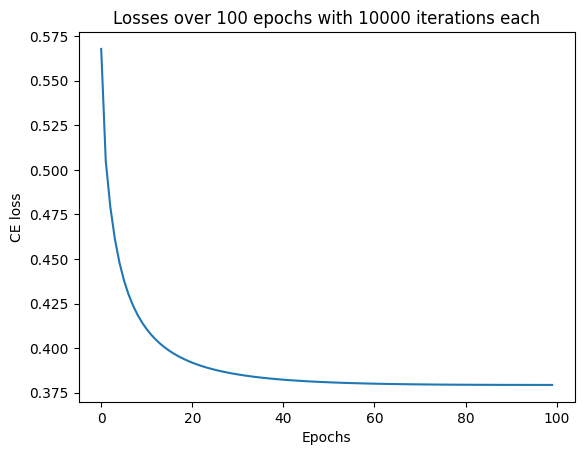

In [7]:
plt.plot(res[1])
plt.title("Losses over 100 epochs with 10000 iterations each")
plt.xlabel("Epochs")
plt.ylabel("CE loss")